# LangChain

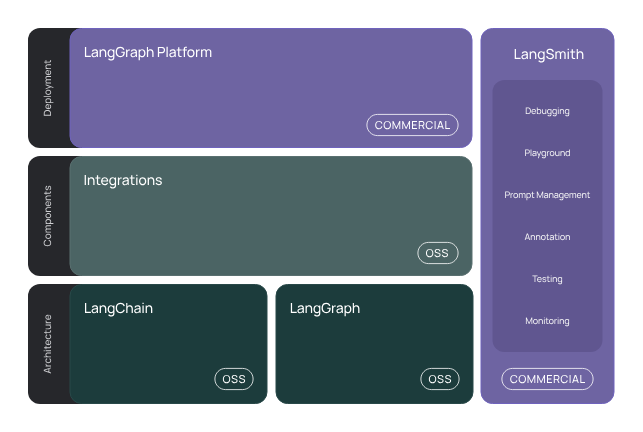

## 构建常见的 client
1. ollama
2. deepseek
3. openai API

In [1]:
from langchain_ollama import ChatOllama
from langgraph.prebuilt import create_react_agent

llm_ollama = ChatOllama(model="qwen3:latest",
                        base_url="http://127.0.0.1:11434",
                        temperature=0.7
                        )

llm_ollama.invoke("Hi! 你好！")


AIMessage(content='<think>\n嗯，用户发来“Hi! 你好！”，看起来是想用中文和我打招呼。我需要回应一个友好的问候。首先，确认用户可能是在测试我的中文能力，或者只是简单地想开始对话。\n\n接下来，我要保持口语化，避免使用复杂句子。可能用户希望得到一个自然、亲切的回应，所以应该用轻松的语气。比如“你好！很高兴见到你～”这样的表达既友好又简洁。\n\n还要考虑用户可能的意图。他们可能只是随便打个招呼，或者想继续深入对话。所以回应中可以加入一些开放性的问题，比如询问用户今天怎么样，或者有没有什么我可以帮忙的。这样能鼓励用户进一步交流，而不是仅仅停留在问候阶段。\n\n另外，要注意文化差异。中文问候通常比较直接，但也要保持礼貌和热情。避免使用过于随意或不恰当的表达。比如用“～”这样的符号来增加亲切感，但不过分。\n\n还要检查是否有潜在的需求。用户可能在寻找帮助，或者只是想练习中文。所以回应中可以表达愿意提供帮助的态度，比如“有什么我可以帮你的吗？”这样既友好又实用。\n\n最后，保持回应简短，避免信息过载。用户可能希望快速得到回应，而不是被冗长的句子打断。所以确保句子结构简单，用词明确。\n</think>\n\n你好！很高兴见到你～今天过得怎么样呀？有什么我可以帮你的吗？😊', additional_kwargs={}, response_metadata={'model': 'qwen3:latest', 'created_at': '2025-08-21T13:37:32.005867Z', 'done': True, 'done_reason': 'stop', 'total_duration': 61352237900, 'load_duration': 4710139700, 'prompt_eval_count': 13, 'prompt_eval_duration': 674489700, 'eval_count': 298, 'eval_duration': 55965397000, 'model_name': 'qwen3:latest'}, id='run--687b1671-615a-462c-b90a-8b8c9a1a7547-0', usage_metadata={'input_tokens': 13, 'outpu

## 使用 stream 模式

In [2]:
messages = [
    ("human", "Return the words Hello World!"),
    ]
for chunk in llm_ollama.stream(messages):
    print(chunk.text(), end="")

<think>
Okay, the user wants me to return the words "Hello World!". Let me make sure I understand the request correctly. They just need the exact phrase, right? No additional formatting or explanation. I should check if there are any specific instructions I need to follow. The example response shows "Hello World!" in a code block, but maybe that's just for demonstration. Wait, the user said "Return the words Hello World!" so perhaps they just want the text without any markdown. Let me confirm. The initial instruction says to put the answer within <answer> tags, so I should follow that format. Alright, I'll make sure to present it simply as the text "Hello World!" inside the answer tags. No need for extra anything else. Let me double-check for typos. Yes, "Hello World!" with the exclamation mark. Got it.
</think>

<answer>Hello World!</answer>

## 区分 system 和 user

In [4]:
from langchain_core.messages import HumanMessage, SystemMessage

messages = [
    SystemMessage("Translate the following from English into Chinese"),
    HumanMessage("hi!"),
]

llm_ollama.invoke(messages)

AIMessage(content='<think>\nOkay, the user sent "hi!" and I need to translate that into Chinese. Let me think. The most common translation for "hi" in Chinese is "你好" (nǐ hǎo), which is a general greeting. Alternatively, depending on the context, it could be "哈喽" (hā lóu), which is more casual and used in informal settings. Since the user just said "hi!" without any specific context, using "你好" would be safe and appropriate. I should make sure there\'s no other nuance I\'m missing. Maybe check if there\'s a more colloquial term, but I think "你好" is the standard translation here.\n</think>\n\n你好！', additional_kwargs={}, response_metadata={'model': 'qwen3:latest', 'created_at': '2025-08-19T10:41:32.2179302Z', 'done': True, 'done_reason': 'stop', 'total_duration': 11965673700, 'load_duration': 1642996500, 'prompt_eval_count': 22, 'prompt_eval_duration': 263766700, 'eval_count': 147, 'eval_duration': 10057720000, 'model_name': 'qwen3:latest'}, id='run--a0daa6e6-98ed-4c5a-89f1-d30249bdd029-

## Template

In [5]:
from langchain_core.prompts import ChatPromptTemplate
system_template = "Translate the following English into {language}"

prompt_template = ChatPromptTemplate.from_messages(
    [
        ("system", system_template),
        ("human", "{text}"),
    ]
)

prompt = prompt_template.invoke({"text": "hi!", "language": "Chinese"})
prompt

ChatPromptValue(messages=[SystemMessage(content='Translate the following English into Chinese', additional_kwargs={}, response_metadata={}), HumanMessage(content='hi!', additional_kwargs={}, response_metadata={})])

In [6]:
llm_ollama.invoke(prompt)

AIMessage(content='<think>\nOkay, the user sent "hi!" and I need to translate that into Chinese. Let me think. The most common translation for "hi" in Chinese is "你好" (nǐ hǎo). But sometimes people might use other phrases depending on the context, like "哈喽" (hā lóu) which is more casual. Since the user just said "hi!" without any specific context, the safest bet is to use the standard greeting. I should also consider if there\'s any nuance I\'m missing. Maybe the user wants a more friendly or informal tone? But without more info, "你好" is the best choice. Let me double-check if there are any other common translations. "喂" (wēi) is another way to say "hello," but it\'s more of a call to someone, maybe less polite. "嗨" (hāi) is another option, which is pretty standard. So between "你好" and "嗨," which is more appropriate? Since "hi" is a general greeting, "你好" is more formal and widely used. I\'ll go with that.\n</think>\n\n你好！', additional_kwargs={}, response_metadata={'model': 'qwen3:late